<a href="https://colab.research.google.com/github/adnaaan10/Data_cleaning-ouliers_detection-Treating_null_values-Visualisation-on-CAR-PRICE-dataset/blob/main/Data_cleaning_%26_visulization_on_car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview: Data Cleaning, Outlier Detection, and Visualization of Car Prices Dataset**

**In this project, we will conduct data preprocessing, outlier detection, and exploratory visualization on a dataset containing car prices. The dataset includes key attributes such as Selling Price, Market Price, Model, Odometer, Condition, and other relevant features for various car brands. Our objective is to ensure data quality by systematically handling missing values, identifying outliers in critical numerical fields like pricing and odometer readings, and visualizing data patterns to extract valuable insights into the factors that influence car prices.**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("/content/car_prices.csv")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# **DATA CLEANING**

In [35]:
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Lot of null values are seen in most of the columns. lets tryout all possible ways of treating null values

In [37]:
df.shape

(558837, 16)

# **1. Listwise Deletion**

In [38]:
# Keep only rows with less than 4 missing values
df_clean = df[df.isnull().sum(axis=1)< 4].reset_index(drop=True).copy()
df_clean

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548452,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
548453,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
548454,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
548455,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [39]:
df_clean.shape

(548457, 16)

so, over 10000 rows with over 4 null values in a row has been removed

# **2. Simple Imputation**

Treating Null values in "CONDITION" column

In [40]:
df_clean["condition"].mean()

30.77773327545962

In [41]:
df_clean["condition"].median()

35.0

<Axes: ylabel='condition'>

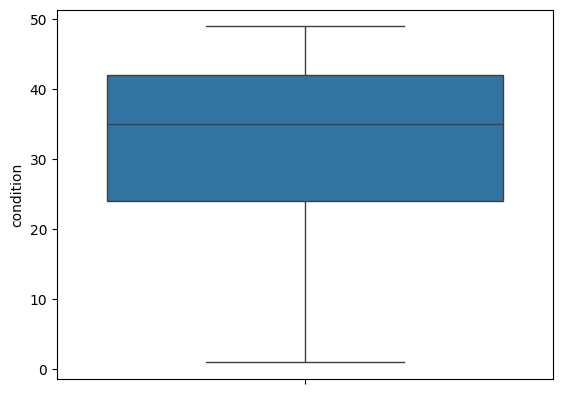

In [42]:
sns.boxplot(df_clean["condition"])

No outlayers are found. so, replacing null values with mean could be ideal

In [43]:
df_clean["condition"] = df_clean['condition'].fillna(df_clean['condition'].mean())

**Treating null values in 'Odometer' column**

In [44]:
df_clean["odometer"].mean()

67521.80156644632

In [45]:
df_clean["odometer"].median()

51394.0

<Axes: ylabel='odometer'>

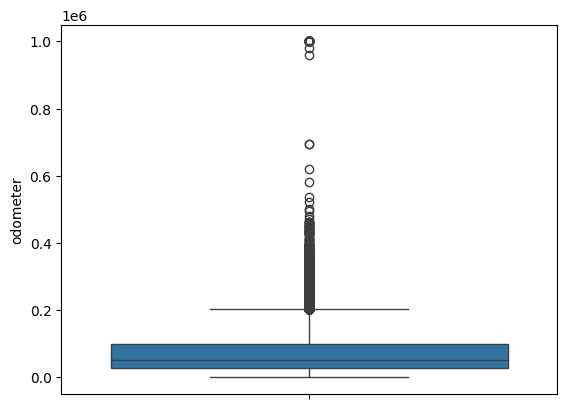

In [46]:
sns.boxplot(df_clean["odometer"])

Lot of outliers have been identified here, so outleirs have to be treated at first by setting the limits

In [47]:
#treating outliers
from scipy.stats.mstats import winsorize
df_clean["odometer"] = winsorize(df_clean["odometer"], limits=[0.05, 0.05])

<Axes: ylabel='odometer'>

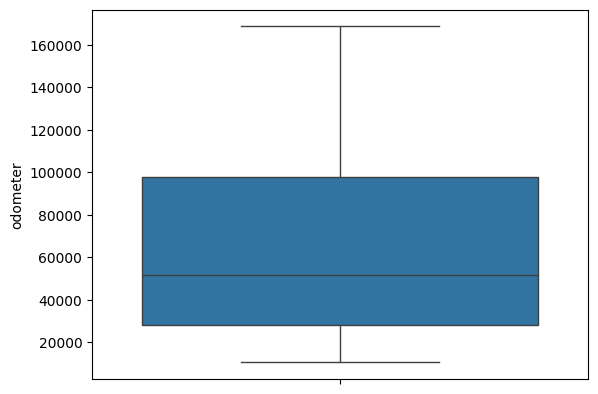

In [48]:
sns.boxplot(df_clean["odometer"])

Hence, no outliers are found. so, lets replace the null values by mean

In [49]:
df_clean["odometer"]=df_clean["odometer"].fillna(df_clean["odometer"].mean())

Treating null values in 'TRANSMISSION' column

In [50]:
df_clean["transmission"].mode()
df_clean["transmission"]=df_clean["transmission"].fillna(df_clean["transmission"].mode()[0])

Treating null values in 'COLOR' column

In [51]:
df_clean["color"].mode()
df_clean["color"]=df_clean["color"].fillna(df_clean["color"].mode()[0])

Treating null values in 'INTERIOR' column

In [52]:
df_clean["interior"].mode()
df_clean["interior"]=df_clean["interior"].fillna(df_clean["interior"].mode()[0])

The null values in the above three columns namely TRANSMISSION,COLOR,INTERIOR were replaced with MODE, as they are of catogorical values.

**Treating null values in 'MMR' column**

<Axes: ylabel='mmr'>

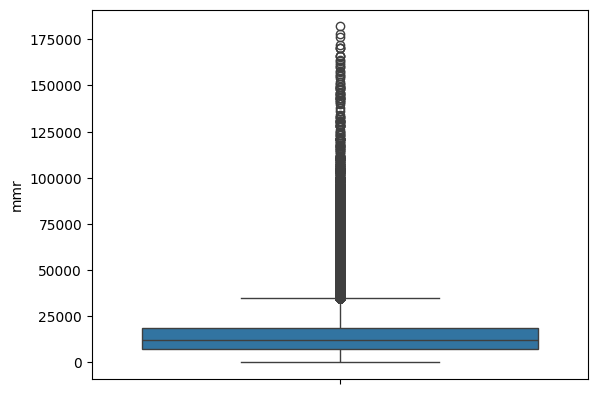

In [53]:
sns.boxplot(df_clean["mmr"])

Treating outliers wont be ideal in the situation of MMR, as each and every point in outliers are very important in the data.

In [54]:
df_clean["mmr"]=df_clean["mmr"].fillna(df_clean["mmr"].median())

In [55]:
df_clean.isnull().sum()

,0
year,0
make,0
model,97
trim,336
body,2875
transmission,0
vin,4
state,0
condition,0
odometer,0


**Treating null values in 'SELLING PRICE' column**

<Axes: ylabel='sellingprice'>

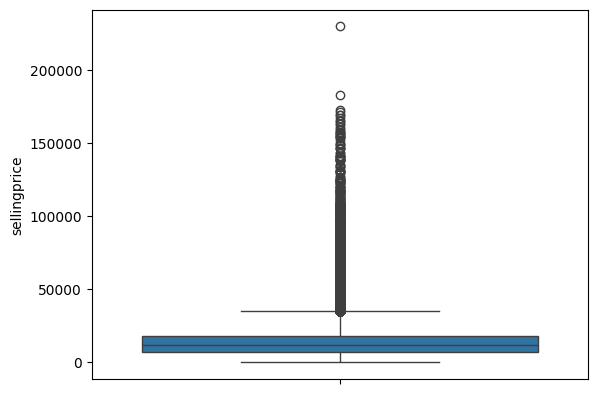

In [56]:
sns.boxplot(df_clean["sellingprice"])

Treating outliers wont be ideal in the situation of SELLING PRICE also like that of MMR, as each and every point in outliers are very important in the data.

In [57]:
df_clean["sellingprice"]=df_clean["sellingprice"].fillna(df_clean["sellingprice"].median())

Treating Null values in SALEDATE column

In [59]:
df_clean['saledate'] = df_clean['saledate'].fillna(method='ffill')

<ipython-input-59-7a1e3923725d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['saledate'] = df_clean['saledate'].fillna(method='ffill')


Treating null values in VIN column

Treating Null values in VIN column is not practically logical as it have to be differed from one to other as it is the unique identity number of a vehicle.

Treating null values in MODEL column

In [61]:
df_clean['model'].mode()

,model
0,Altima


In [62]:
df_clean['model'] = df_clean['model'].fillna(df_clean['model'].mode()[0])

Treating null values in TRIM column

In [63]:
df_clean['trim'].mode()[0]

'Base'

In [64]:
df_clean['trim'] = df_clean['trim'].fillna(df_clean['trim'].mode()[0])

Treating null values in 'BODY' column

In [66]:
df_clean["body"].mode()
df_clean["body"]=df_clean["body"].fillna(df_clean["body"].mode()[0])

In [67]:
df_clean.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,4
state,0
condition,0
odometer,0


# **VISUALIZATION OF THE CLEANED DATA**

**1.TOP 10 SUV SELLING CAR BRANDS**

In [68]:
filtsuv=df_clean[df_clean['body']=="SUV"]
suv_group=filtsuv["make"].value_counts().head(10)
suv_group

,count
make,
Ford,24490
Chevrolet,12807
Jeep,12704
Nissan,10262
Toyota,6569
GMC,5685
Dodge,4919
Honda,4700
Kia,3960


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ford'),
  Text(1, 0, 'Chevrolet'),
  Text(2, 0, 'Jeep'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'GMC'),
  Text(6, 0, 'Dodge'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Kia'),
  Text(9, 0, 'BMW')])

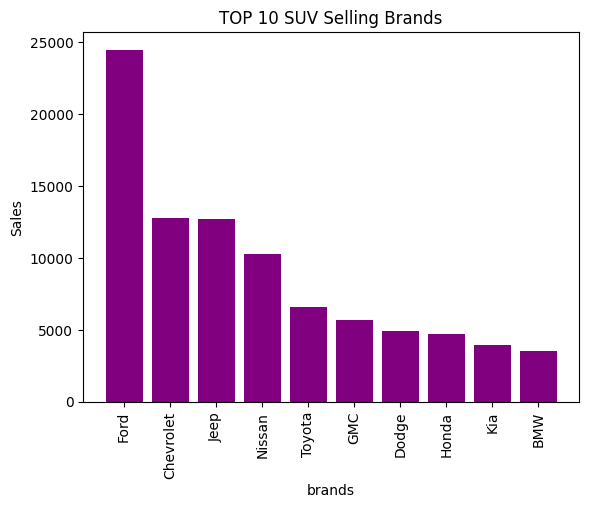

In [70]:
plt.bar(suv_group.index,suv_group.values,color="purple")
plt.title("TOP 10 SUV Selling Brands")
plt.xlabel("brands")
plt.ylabel("Sales")
plt.xticks(rotation=90)

INSIGHT: It is visible that, Ford is having high number of SUV sales.

**2.TOP 5 BRANDS WITH GOOD CONDITION CARS**

Text(0.5, 1.0, 'TOP 5 BRANDS WITH BEST CONDITION')

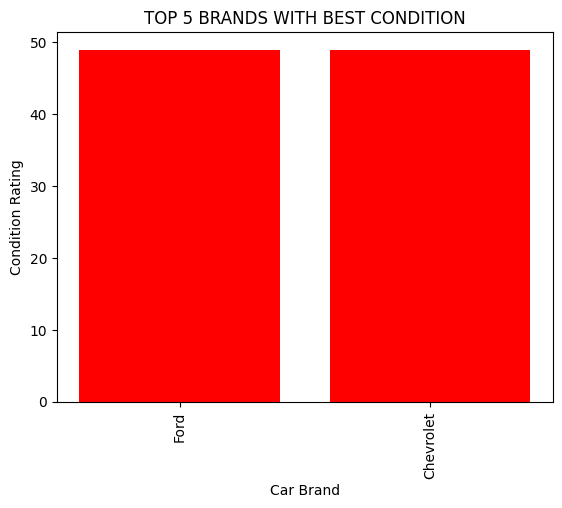

In [72]:
condition_vehicles=df_clean.sort_values(by="condition",ascending=False).head(10)
condition_vehicles_name=condition_vehicles["make"].head(10)
Top_condition_vehicles=condition_vehicles["condition"]
plt.bar(condition_vehicles_name,Top_condition_vehicles,color="red")
plt.xticks(rotation=90)
plt.xlabel("Car Brand")
plt.ylabel("Condition Rating")
plt.title("TOP 5 BRANDS WITH BEST CONDITION")

**3.TRANSMISSION DISTRIBUTION**

In [73]:
gear_group=df_clean["transmission"].value_counts().head(2)
gear_group

,count
transmission,
automatic,531439
manual,16992


Text(0.5, 1.0, 'Transmission distribution')

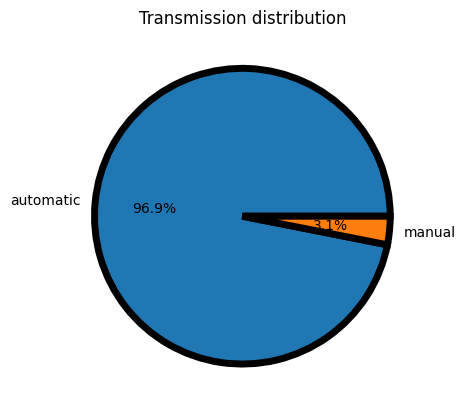

In [74]:
wedgeprops={"edgecolor":"black","linewidth":5}
plt.pie(gear_group,labels=gear_group.index,wedgeprops=wedgeprops,autopct="%1.1f%%")
plt.title("Transmission distribution")

INSIGHT: It is visible that 96.9% of the cars are automatic in transmission.

**4.CARS WITH HIGH MARKET VALUE**

In [75]:
high_mmr=df_clean.groupby("make")["mmr"].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'marketing price')

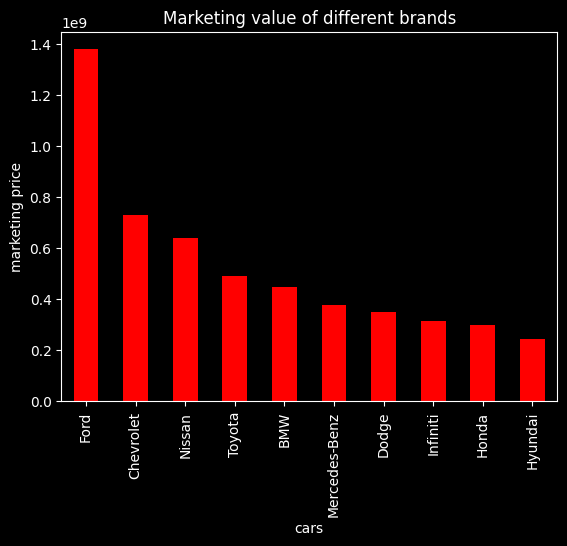

In [76]:
plt.style.use("dark_background")
high_mmr.plot(kind="bar",x=high_mmr.index,y=high_mmr.values,color="red")
plt.title("Marketing value of different brands")
plt.xlabel("cars")
plt.ylabel("marketing price")

INSIGHT: It can analysed that FORD is brand with high market value which shows its reliability and quality.

**5. VARIENTS WISE SALE OF KIA**

In [77]:
kia_cars=df_clean[df_clean["make"]=="kia"]
gpc=kia_cars.groupby([ 'model'])['sellingprice'].mean()
gpc

,sellingprice
model,
borrego,9000.000000
optima,2600.000000
rio,4666.666667
sportage,2900.000000


Text(0, 0.5, 'sellingprice')

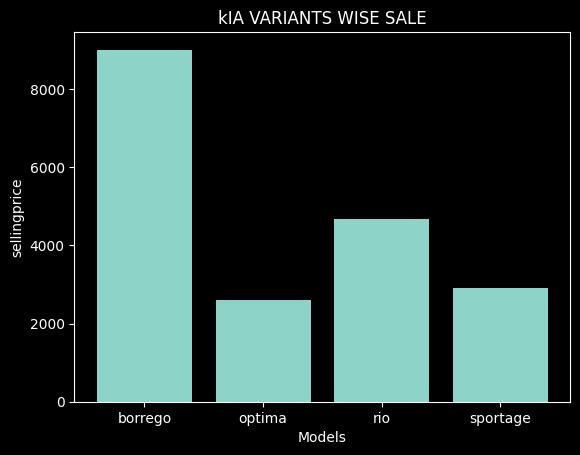

In [78]:
plt.bar(gpc.index,gpc.values)
plt.title("kIA VARIANTS WISE SALE")
plt.xlabel("Models")
plt.ylabel("sellingprice")

INSIGHT: Among the varients of KIA, it is seen that borrego has highest sale price

**6.CARS WITH HIGH SELLING PRICE**

In [79]:
high_selling_price=df_clean.sort_values(by="sellingprice",ascending=False).head(10)

Text(0, 0.5, 'selling price')

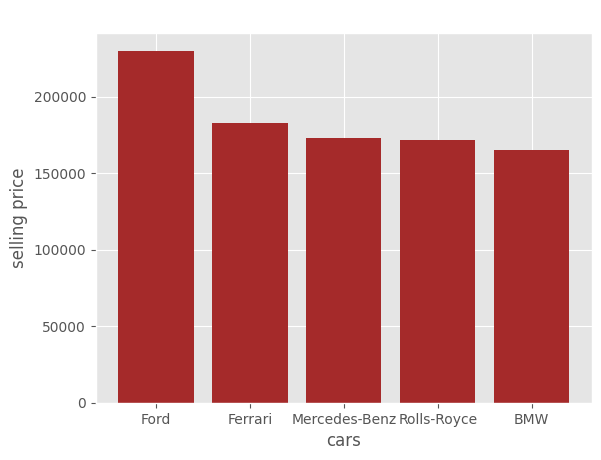

In [81]:
plt.style.use("ggplot")
plt.bar(high_selling_price["make"],high_selling_price["sellingprice"],color="brown")
plt.title("Cars with high selling price")
plt.xlabel("cars")
plt.ylabel("selling price")

INSIGHT: It can be analysed that, ford has got the cars with high selling price